# Blind Detection

### Notes
Niek ruben max AI studenten startup.

transfer learning

Evaluation with labels

change model to sklearn tutorial


## On the  data set 

The dataset provides a large set of retina images taken using fundus photography under a variety of imaging conditions.
A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0.  No DR
1.  Mild
2.  Moderate
3.  Severe
4.  Proliferative DR

5.  Other disease

### Oog arts tips:
De ernst van de Diabetische retinopathie kan een afspiegeling zijn van het rest van het lichaam voor een diabetes patient.

5 is required want een oogarts zou dit zien en doorverwijzen ook als dat niet oorspronkelijk het doel was. Als dit niet werkt dan wordt het product hoogst waarschijnlijk niet gebruikt.
    5 is niet nodig als er al een regelmatige check van een oog arts is (elke 2/4 jaar)

This data set contains noise in both the images and labels. Images may contain artifacts, be out of focus, underexposed, or overexposed. The images were gathered from multiple clinics using a variety of cameras over an extended period of time, which will introduce further variation.

## Considered Datasets
### Dataset 1
Dataset of eyes with and without Diabetische retinopathie: <br>
https://www.kaggle.com/donkeys/retinopathy-train-2015?select=trainLabels.csv

Op 3 plekken worden diabetes screeningen gedaan voor de ogen
1. ziekenhuis
2. kliniek (prive ziekenhuis)
3. optiek zaken (optimitrist voert het onderzoek voor de ogen uit)
    - maakt foto van netvlies
    - dan kijken hoe goed hij kan kijken

Als de ernst moderate of erger is dan worden de foto's altijd door een oog arts bekeken in een ziekenhuis of kliniek
<br>
Grootste voordeel: Zou de foto's kunnen laten maken door niet gespecialiseerd personeel wat geld en tijd kan schelen voor de diabetes patienten en artsen.

### Dataset 2
Smaller dataset with multiple eye disease: <br> 
https://www.kaggle.com/andrewmvd/ocular-disease-recognition-odir5k

Meest interresante als hij zou werken omdat het een grote impact heeft op kwaliteit van zorg bespaart veel tijd voor artsen en patienten, denk aan doorverwezen worden naar het juiste specialisme.<br>
Leukste dataset maar verwachting is laag/slechte resultaten.<br>
Weinig data per categorie.<br>
Eventueel niet betrouwbaar (stakeholder dacht een fout te zien tijdens bekijken).


### Dataset 3
Dataset with images that are taken with a different more expensive machine that is not normally found outside of hospitals, but shows more interesting data: <br>
https://www.kaggle.com/paultimothymooney/kermany2018

Belangrijk bij de foto's is dat het gebruikt wordt als progressie foto's van 1 patient bij een arts.<br>
Een arts moet hierbij zelf precies gaan kijken wat voor medicatie toepasbaar is; dit is buiten de scope van het project en te moeilijk. <br>
Daarnaast is het risico en de schade als er iets fout gaat hoog.


### Dataset 4
Dataset of images with and without Glaucoma. This dataset has images that are very similar and might be more consistent for a ML algorithm to categorize: <br>
https://www.kaggle.com/sshikamaru/glaucoma-detection

Te kleine dataset(minder dan 1k foto's) en normaal andere techniek voor gebruik.<br>
Patient heeft deze ziekte vaak niet door en zou daarom veel voordeel uit het onderzoek halen omdat het vroeg gevonden zou kunnen worden.<br>

### Choice
We besloten dat dataset 1 de meeste waarde voor de oogzorg in combinatie met de beste kans op slagen heeft.

In [10]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.io import imread_collection


In [11]:
labels = pd.read_csv("C:/Users/mauri/Documents/GitHub/EyeDiseaseDetection/Data/trainLabels.csv")

In [12]:
labels.sample(20)

,image,level
12090,15192_left,0
54,59_left,0
1008,1240_left,0
28693,36339_right,0
29647,37528_right,2
34451,43540_right,1
18481,23280_right,0
317,374_right,1
9957,12561_right,0
447,513_right,0


In [13]:
def transformImage(f, img_num=None):
        img = io.imread(f)
        im_res = resize(img,(597, 896))
        ## Turn images grey
        # img_gray = rgb2gray(img)        
        # im_res = resize(img_gray,(597, 896))

        return im_res

In [14]:
if __name__ == "__main__":
    img_collections = io.ImageCollection('Data/trainSet/*.png',load_func=transformImage)
    img_collections[1].shape

In [15]:
img_collections[3].shape

(597, 896, 3)

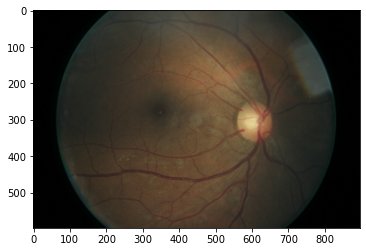

In [16]:
plt.imshow(img_collections[0], cmap=plt.cm.binary)

In [17]:
# shapedImg_collections = {'remove': [100], 'Y': [597], 'X': [896], 'Z': [3]}
# shapedImg_collections = pd.DataFrame(data=shapedImg_collections)

# shapedImg_collections = shapedImg_collections.append(img_collections[:100])
# shapedImg_collections.head(10)
# test = pd.Series(data=img_collections)
# test

In [18]:
img_collections[0]
shapedImg_collections = np.array(img_collections[:1000])
# shapedImg_collections = np.array(shapedImg_collections)

## Labels

In [56]:
labels_reset = labels.set_index('image')
# labels_reset[['level']]

label_list =(labels_reset[['level']].values.flatten().tolist())

In [57]:
label_list = np.asarray(label_list)
label_list

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
label_names = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
label_names[label_list[1]]


'No DR'

In [59]:
label_list = label_list[824:1824]
label_list[0]

3

# Model test

In [23]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(597, 896, 3)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1604736)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               205406336 
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 205,407,626
Trainable params: 205,407,626
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=shapedImg_collections, y=label_list, epochs=5)

Epoch 1/5
32/32 [==============================] - 31s 704ms/step - loss: 98.4515 - accuracy: 0.5820
Epoch 2/5
32/32 [==============================] - 22s 690ms/step - loss: 29.6036 - accuracy: 0.5860
Epoch 3/5
32/32 [==============================] - 22s 700ms/step - loss: 32.4668 - accuracy: 0.5960
Epoch 4/5
32/32 [==============================] - 22s 684ms/step - loss: 23.1070 - accuracy: 0.6110
Epoch 5/5
32/32 [==============================] - 22s 678ms/step - loss: 12.8265 - accuracy: 0.6380


In [61]:
version = "002"
model.save(f"Models/model{version}.h5")

# Testing

In [62]:
saved_model = keras.models.load_model("Models/model002.h5")
saved_model

In [63]:
test_collections = io.ImageCollection('Data/testSet/*.png',load_func=transformImage)
test_collections[1].shape
shapedTest_collections = np.array(test_collections)

In [64]:
predictions = saved_model.predict(shapedTest_collections)

In [65]:
startingIndex = 0
for index in range(startingIndex, startingIndex+12):
    print(f"{index+2}: {label_names[np.argmax(predictions[index])]}")

2: Proliferative DR
3: No DR
4: No DR
5: No DR
6: No DR
7: No DR
8: No DR
9: Mild
10: No DR
11: Moderate
12: No DR
13: No DR


In [66]:
startingIndex = 0
for index in range(startingIndex, startingIndex+12):
    print(f"{index+2}: {[np.argmax(predictions[index])]}")

2: [4]
3: [0]
4: [0]
5: [0]
6: [0]
7: [0]
8: [0]
9: [1]
10: [0]
11: [2]
12: [0]
13: [0]


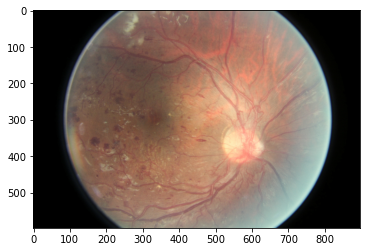

In [67]:
plt.imshow(shapedTest_collections[6], cmap=plt.cm.binary)